## NG production report with ppt

In [1]:
import pandas as pd

df = pd.read_excel(r"D:\My Documents\Desktop\python_office\src\data\ng_data_january.xlsx")
df

,production_date,ng_topic,amount
0,2019-01-01,blur,1
1,2019-01-01,incomplete,1
2,2019-01-01,incomplete,1
3,2019-01-01,blur,1
4,2019-01-01,incomplete,1
...,...,...,...
9488,2019-01-31,short mold,1
9489,2019-01-31,no solder,1
9490,2019-01-31,incomplete,1
9491,2019-01-31,no solder,1


In [2]:
pivot = pd.pivot_table(df,index="production_date",columns="ng_topic",values="amount",aggfunc="sum",margins=True,margins_name="Total")
pivot

ng_topic,blur,burn,incomplete,nick,no solder,short mold,Total
production_date,,,,,,,
2019-01-01 00:00:00,86,25,120,18,31,119,399
2019-01-02 00:00:00,80,22,125,25,43,126,421
2019-01-03 00:00:00,83,20,119,21,30,109,382
2019-01-04 00:00:00,80,14,120,23,41,115,393
2019-01-07 00:00:00,82,18,136,27,42,99,404
2019-01-08 00:00:00,70,22,127,16,50,145,430
2019-01-09 00:00:00,76,22,134,26,41,129,428
2019-01-10 00:00:00,72,17,117,28,32,117,383
2019-01-11 00:00:00,77,22,145,27,41,132,444


In [3]:
df_ng = pivot.loc[["Total"]].T[:-1]
df_ng = df_ng.sort_values(by="Total",ascending=False)
df_ng["cum_percentage"] = round(df_ng["Total"].cumsum()/df_ng["Total"].sum()*100,2)
df_ng

production_date,Total,cum_percentage
ng_topic,,
incomplete,2940,30.97
short mold,2870,61.20
blur,1801,80.17
no solder,942,90.10
nick,496,95.32
burn,444,100.00


Text(0, 0.5, 'Cumulative Percentage')

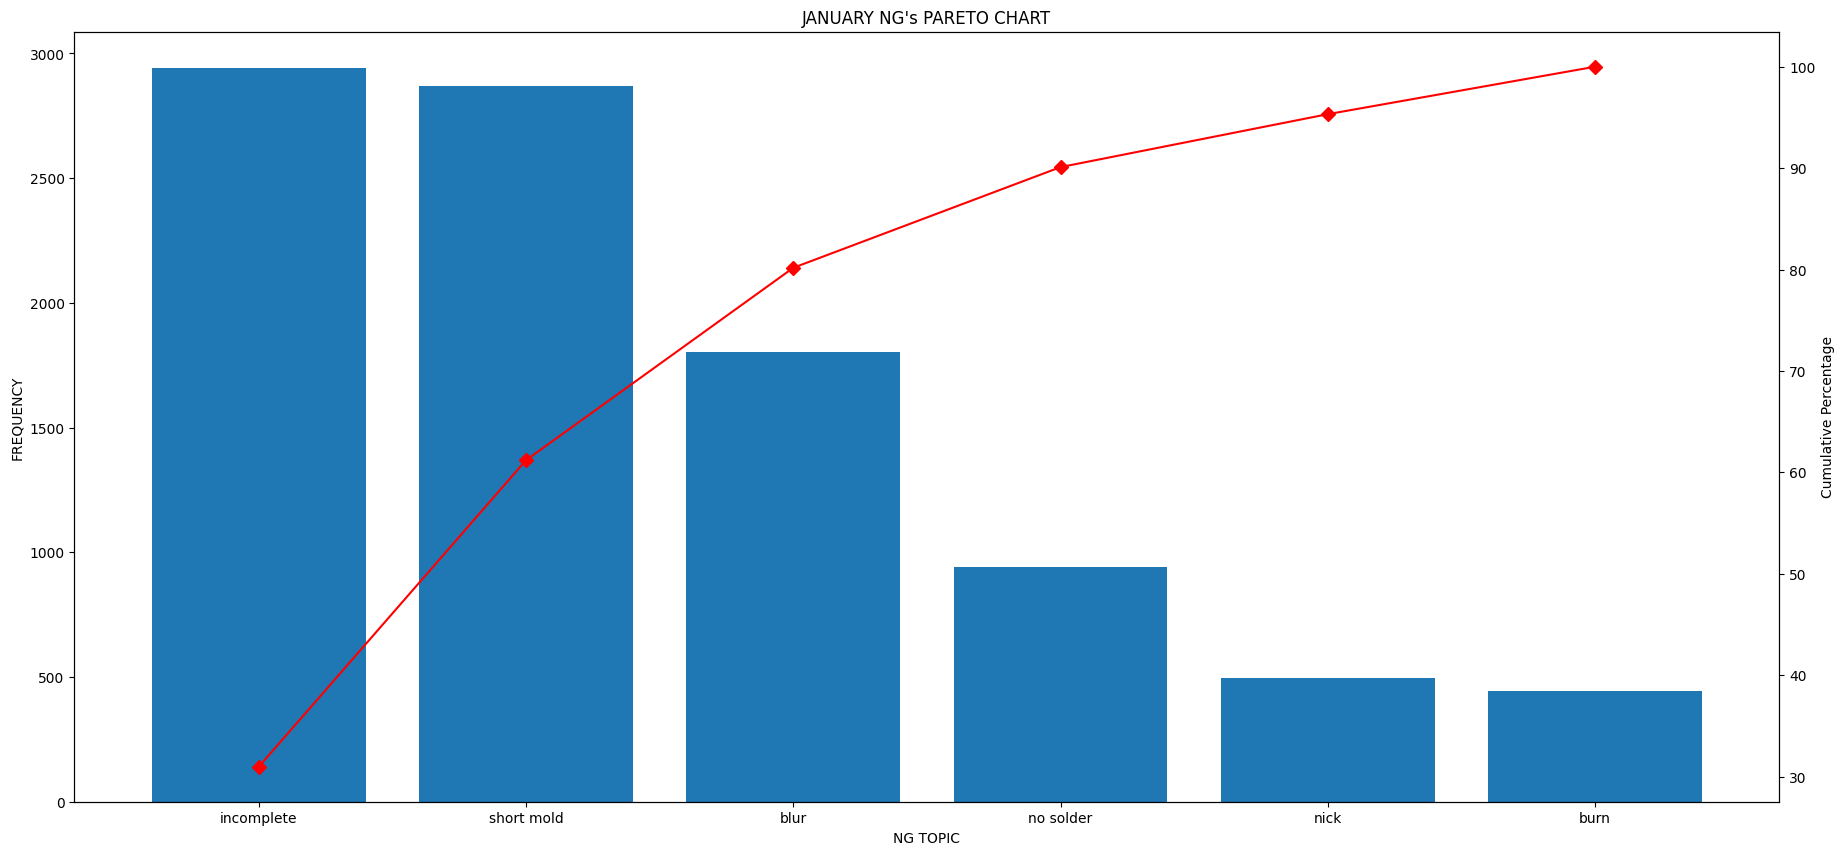

In [10]:
from matplotlib import pyplot as plt

x = df_ng.index
y = df_ng["Total"]
y2 = df_ng["cum_percentage"]

fig,ax = plt.subplots(figsize=(22,10))
ax.bar(x,y)
ax.set_title("JANUARY NG's PARETO CHART")
ax.set_xlabel("NG TOPIC")
ax.set_ylabel("FREQUENCY")

ax2 = ax.twinx()
ax2.plot(x,y2,color="red",marker="D",ms=7)
ax2.set_ylabel("Cumulative Percentage")